# Dogs vs Cats classification

To start you will need to download and unzip the competition data from [here](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) (Kaggle) and ensure your directory structure looks like this
```
utils/
    vgg16.py
    utils.py
data/
    train/
         cat.437.jpg
         dog.9924.jpg
         cat.1029.jpg
         dog.4374.jpg
    test/
        231.jpg
        325.jpg
        1235.jpg
        9923.jpg
```
You should launch your notebook inside this repo directory

### Organize data for Keras

In [2]:
from __future__ import print_function,division
%matplotlib inline
import os, sys
from shutil import copyfile
import numpy as np
sys.path.insert(1,'utils')
from vgg16 import *
from utils import *

Using TensorFlow backend.


In [3]:
DATA_PATH = os.getcwd() + '/data'
ORIGINAL_PATH = os.getcwd() + '/'

In [4]:
#create directories
%cd $DATA_PATH
%mkdir -p results
%mkdir -p valid
%mkdir -p sample
%cd sample
%mkdir -p train
%mkdir -p test
%mkdir -p valid
%mkdir -p results
%cd $ORIGINAL_PATH

/Users/rax/projects/deep_learning/github/cats-vs-dogs/data
/Users/rax/projects/deep_learning/github/cats-vs-dogs/data/sample


In [34]:
#transfer data to sample and valid. Sample data will be used for testing purpose

%cd $DATA_PATH/train/
g = glob("*.jpg" )
shuffle = np.random.permutation(g)
for i in range(2000): copyfile(shuffle[i],DATA_PATH+'/valid/'+shuffle[i])

g = glob("*.jpg")
shuffle = np.random.permutation(g)
for i in range(200): copyfile(shuffle[i], DATA_PATH+'/sample/train/'+shuffle[i])

%cd $DATA_PATH/valid/
g = glob("*.jpg")
shuffle = np.random.permutation(g)
for i in range(50): copyfile(shuffle[i], DATA_PATH+'/sample/valid/'+shuffle[i])

%cd $DATA_PATH/test/
g = glob("*.jpg" )
shuffle = np.random.permutation(g)
for i in range(100): copyfile(shuffle[i],DATA_PATH+'/sample/test/'+shuffle[i])

/Users/rax/projects/deep_learning/github/cats-vs-dogs/data/train


In [50]:
#divide the data into cats and dogs folder
%cd $DATA_PATH/train/
%mkdir -p cats
%mkdir -p dogs
%mv dog.*.jpg dogs/
%mv cat.*.jpg cats/

%cd $DATA_PATH/test
%mkdir -p unknown
%mv *.jpg unknown/

%cd $DATA_PATH/sample/train/
%mkdir -p cats
%mkdir -p dogs
%mv dog.*.jpg dogs/
%mv cat.*.jpg cats/

%cd $DATA_PATH/sample/valid/
%mkdir -p cats
%mkdir -p dogs
%mv dog.*.jpg dogs/
%mv cat.*.jpg cats/

%cd $DATA_PATH/sample/test
%mkdir -p unknown
%mv *.jpg unknown/

/Users/rax/projects/deep_learning/github/cats-vs-dogs/data/sample/train


### Prepare Model

In [12]:

%cd $DATA_PATH 

#Use below if you want to test on sample first else comment below DATA_PATH command
DATA_PATH = DATA_PATH + '/sample'

train_path = DATA_PATH + '/train/'
valid_path = DATA_PATH + '/valid/'
test_path = DATA_PATH + '/test/'
result_path = DATA_PATH + '/results/'

/Users/rax/projects/deep_learning/github/cats-vs-dogs/data


In [13]:
vgg = Vgg16()

In [14]:
batch_size= 64
no_epoch = 3
train_batches = vgg.get_batches(train_path,batch_size=batch_size) 
valid_batches = vgg.get_batches(valid_path,batch_size=batch_size*2)
vgg.finetune(train_batches)

vgg.model.optimizer.lr = 0.01

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [15]:
#train and save weights for every epoch
latest_model_filename= None
for i in range(no_epoch):
    print('Running Epoch: '+str(i))
    vgg.fit(train_batches,valid_batches,nb_epoch=1)
    latest_model_filename = 'ft%d.h5'%i
    vgg.model.save_weights(result_path+latest_model_filename)
    
print('Completed %d epochs. Model trained'%no_epoch)

Running Epoch: 0
Epoch 1/1
200/200 [==============================] - 217s - loss: 2.8980 - acc: 0.6300 - val_loss: 5.0407 - val_acc: 0.5800
Running Epoch: 1
Epoch 1/1
200/200 [==============================] - 220s - loss: 4.3680 - acc: 0.6550 - val_loss: 0.3531 - val_acc: 0.9400
Running Epoch: 2
Epoch 1/1
200/200 [==============================] - 223s - loss: 1.4607 - acc: 0.8750 - val_loss: 3.0082 - val_acc: 0.7600
Completed 3 epochs. Model trained


### Prediction

Found 24 images belonging to 1 classes.
[[  9.9197e-01   8.0335e-03]
 [  1.0000e+00   0.0000e+00]
 [  2.5261e-05   9.9997e-01]
 [  4.5099e-15   1.0000e+00]
 [  9.4214e-23   1.0000e+00]]
['unknown/102.jpg', 'unknown/112.jpg', 'unknown/12.jpg', 'unknown/13.jpg', 'unknown/131.jpg']


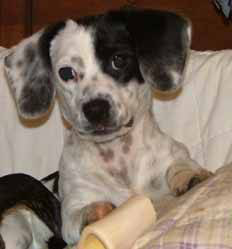

In [18]:
batches, pred = vgg.test(test_path, batch_size = batch_size * 2)
filenames = batches.filenames

print(pred[::5])
print(filenames[:5])

#check image
from PIL import Image
Image.open(test_path+filenames[1])

In [66]:
save_array(result_path+'test_preds.dat',pred)
save_array(result_path+'filenames.dat',filenames)

### Verfiy Prediction

1. Verfiy few correct prediction
2. Verifiy few incorrect prediction
3. Verfiy misclassified prediction in both the categories

In [24]:
#verify few correct prediction
vgg.model.load_weights(result_path+latest_model_filename)
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [26]:
filenames = val_batches.filenames
expected_labels = val_batches.classes
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [37]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)

n_view = 4

Found 38 correct labels


Found 38 correct labels


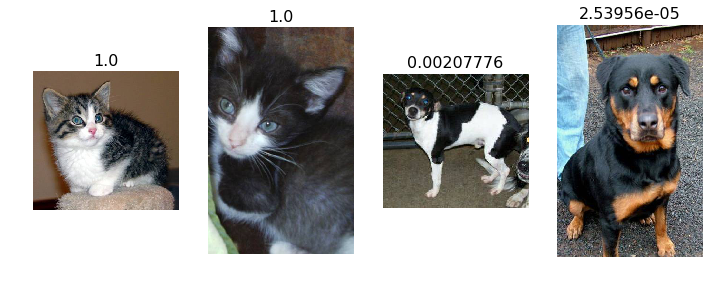

In [39]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 12 incorrect labels


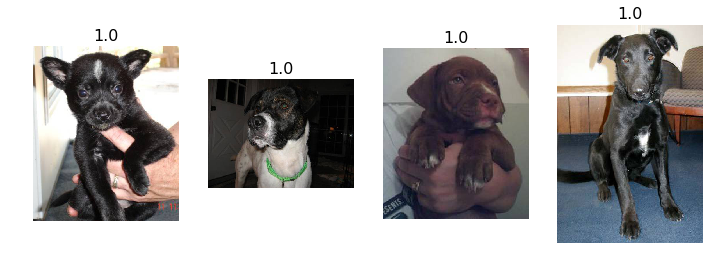

In [51]:
#2. A few incorrect labels at random
correct = np.where(our_labels!=expected_labels)[0]
print("Found %d incorrect labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 12 incorrect cats


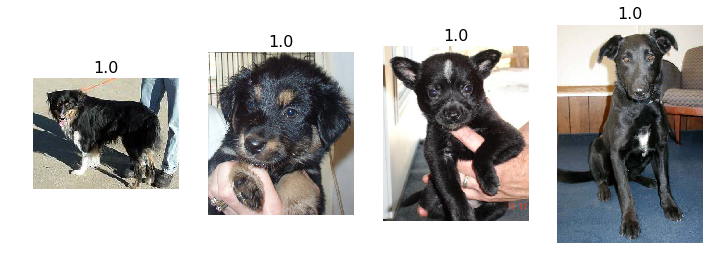

In [57]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

[[26  0]
 [12 12]]


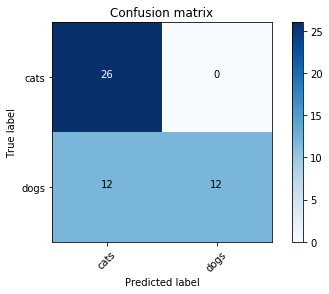

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)
plot_confusion_matrix(cm, val_batches.class_indices)

### Submit on kaggle

In [67]:
preds = load_array(result_path + 'test_preds.dat')
filenames = load_array(result_path + 'filenames.dat')
isdog = pred[:,1]

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from IPython.display import FileLink

#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
subm = np.stack([ids,isdog], axis=1)

In [91]:
%cd $ORIGINAL_PATH
%cd submission
submission_file_name = 'kaggleSubmission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/Users/rax/projects/deep_learning/github/cats-vs-dogs
/Users/rax/projects/deep_learning/github/cats-vs-dogs/submission


In [92]:
%cd $ORIGINAL_PATH
from IPython.display import FileLink
FileLink('submission/'+submission_file_name)

/Users/rax/projects/deep_learning/github/cats-vs-dogs


/Users/rax/projects/deep_learning/github/cats-vs-dogs/submission/kaggleSubmission1.csv